# CS483 Job Bias Course Project
#### Group Members: Om Gor, Mario Tabares
## Data Cleaning/Transformation

In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset by its name from Hugging Face.
ds =load_dataset("LabHC/bias_in_bios")

# Loading the premade split datasets
train_df =ds["train"].to_pandas()
val_df =ds["dev"].to_pandas()
test_df =ds["test"].to_pandas()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001-0ab65b32c47407(…):   0%|          | 0.00/64.9M [00:00<?, ?B/s]

data/test-00000-of-00001-5598c840ce8de1e(…):   0%|          | 0.00/24.9M [00:00<?, ?B/s]

data/dev-00000-of-00001-e6551072fff26949(…):   0%|          | 0.00/9.95M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/257478 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/99069 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/39642 [00:00<?, ? examples/s]

In [ ]:
# Example of dataset (Train)
train_df

,hard_text,profession,gender
0,He is also the project lead of and major contr...,21,0
1,"She is able to assess, diagnose and treat mino...",13,1
2,"Prior to law school, Brittni graduated magna c...",2,1
3,He regularly contributes to India’s First Onli...,11,0
4,He completed his medical degree at Northwester...,21,0
...,...,...,...
257473,"She photographs advertising images, people in ...",18,1
257474,He is also a graduate of Communications and Me...,24,0
257475,She says one of the first steps in stopping ma...,21,1
257476,He has been photographing for twenty years and...,18,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257478 entries, 0 to 257477
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   hard_text   257478 non-null  object
 1   profession  257478 non-null  int64 
 2   gender      257478 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.9+ MB


In [ ]:
print('Missing/NA data in datasets\n')
for data in [train_df, val_df, test_df]:
    print(f"{data.isna().sum()}")
    print("-"*25)

Missing/NA data in datasets

hard_text     0
profession    0
gender        0
dtype: int64
-------------------------
hard_text     0
profession    0
gender        0
dtype: int64
-------------------------
hard_text     0
profession    0
gender        0
dtype: int64
-------------------------


In [ ]:
# This cell cleans the biography text and creates a 'text_clean' column.
# Cleaning steps:
# 1. lowercase
# 2. remove numbers
# 3. remove punctuation
# 4. remove extra spaces
# 5. strip spaces at start and end

def clean_text(t):
    # Make sure the input is a string.
    t =str(t)
    # 1. Make all letters lowercase.
    t =t.lower()
    # 2. Remove digits/numbers.
    t =re.sub(r"\d+", " ", t)
    # 3. Remove punctuation marks like . , ? ! etc.
    t =t.translate(str.maketrans("", "", string.punctuation))
    # 4. Replace multiple spaces/newlines with a single space.
    t =re.sub(r"\s+", " ", t)
    # 5. Remove spaces at the beginning and end.
    t =t.strip()
    return t

In [ ]:
def clean_df(df):
    df.drop_duplicates(subset=["hard_text", "profession", "gender"])
    df["clean_text"] =df["hard_text"].apply(clean_text)

    gender_map ={0: "male", 1: "female"}
    df["gender_str"] =df["gender"].map(gender_map)

    profession_map ={
        0: "accountant", 1: "architect", 2: "attorney", 3: "chiropractor",
        4: "comedian", 5: "composer", 6: "dentist", 7: "dietitian",
        8: "dj", 9: "filmmaker", 10: "interior_designer", 11: "journalist",
        12: "model", 13: "nurse", 14: "painter", 15: "paralegal",
        16: "pastor", 17: "personal_trainer", 18: "photographer",
        19: "physician", 20: "poet", 21: "professor", 22: "psychologist",
        23: "rapper", 24: "software_engineer", 25: "surgeon",
        26: "teacher", 27: "yoga_teacher"
    }
    df['profession_str'] =df["profession"].map(profession_map)

    return df[['clean_text', 'profession', 'profession_str', 'gender', 'gender_str']]

train_df_cleaned =clean_df(train_df)
val_df_cleaned =clean_df(val_df)
test_df_clean =clean_df(test_df)

In [ ]:
#Testing the saved dataset
#This code is needed to just test the saving of datasets- one time use for testing
train_df_cleaned.to_csv("bias_in_bios_train.csv", index=False)
val_df_cleaned.to_csv("bias_in_bios_val.csv", index=False)
test_df_clean.to_csv("bias_in_bios_test.csv", index=False)

# optional full clean
full_clean =pd.concat([train_df_cleaned, val_df_cleaned, test_df_clean], ignore_index=True)
full_clean.to_csv("bias_in_bios_clean.csv", index=False)

print("Saved:")
print(" - bias_in_bios_train.csv")
print(" - bias_in_bios_val.csv")
print(" - bias_in_bios_test.csv")
print(" - bias_in_bios_clean.csv")


Saved:
 - bias_in_bios_train.csv
 - bias_in_bios_val.csv
 - bias_in_bios_test.csv
 - bias_in_bios_clean.csv


In [ ]:
train_df_cleaned.head()

,clean_text,profession,profession_str,gender,gender_str
0,he is also the project lead of and major contr...,21,professor,0,male
1,she is able to assess diagnose and treat minor...,13,nurse,1,female
2,prior to law school brittni graduated magna cu...,2,attorney,1,female
3,he regularly contributes to india’s first onli...,11,journalist,0,male
4,he completed his medical degree at northwester...,21,professor,0,male


In [ ]:
# Count how many bios per gender.
gender_counts =train_df_cleaned["gender_str"].value_counts()
gender_props  =train_df_cleaned["gender_str"].value_counts(normalize=True)

print("Gender counts:")
print(gender_counts)
print("\nGender proportions:")
print(gender_props)

Gender counts:
gender_str
male      138780
female    118698
Name: count, dtype: int64

Gender proportions:
gender_str
male      0.538998
female    0.461002
Name: proportion, dtype: float64


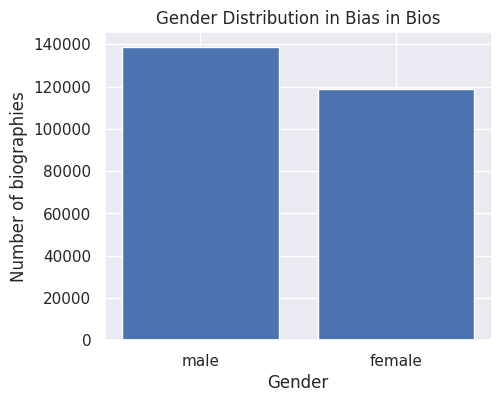

In [ ]:
plt.figure(figsize=(5, 4))
plt.bar(gender_counts.index, gender_counts.values)
plt.title("Gender Distribution in Bias in Bios")
plt.xlabel("Gender")
plt.ylabel("Number of biographies")
plt.show()

In [ ]:
# This cell looks at how many examples each profession has, and shows the top 10.

# Number of unique professions.
num_prof =train_df_cleaned["profession"].nunique()
print("Number of unique professions:", num_prof)

# Top 10 most common professions by ID.
prof_counts =train_df_cleaned["profession_str"].value_counts().head(10)
print("\nTop 10 profession IDs by count:")
print(prof_counts)

Number of unique professions: 28

Top 10 profession IDs by count:
profession_str
professor       76748
physician       26648
attorney        21169
photographer    15773
journalist      12960
nurse           12316
psychologist    11945
teacher         10531
dentist          9479
surgeon          8829
Name: count, dtype: int64


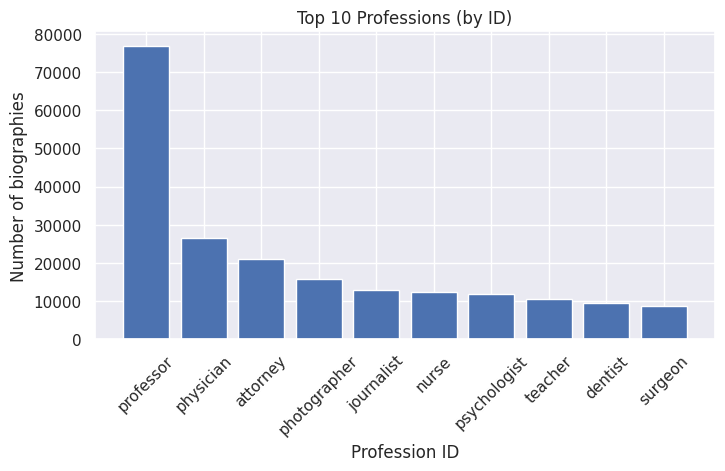

In [ ]:
# Plot a bar chart for the top 10 professions.
plt.figure(figsize=(8, 4))
plt.bar(prof_counts.index.astype(str), prof_counts.values)
plt.title("Top 10 Professions (by ID)")
plt.xlabel("Profession ID")
plt.ylabel("Number of biographies")
plt.xticks(rotation=45)
plt.show()

In [ ]:
profession_pt =train_df_cleaned.pivot_table(index ='profession_str', columns ='gender', values ='clean_text', aggfunc ='count')
profession_pt['total'] =profession_pt.sum(axis=1)
profession_pt.loc['Total'] =profession_pt.sum(axis=0)

profession_pt

gender,0,1,total
profession_str,,,
accountant,2317,1343,3660
architect,5014,1554,6568
attorney,13064,8105,21169
chiropractor,1271,454,1725
comedian,1439,385,1824
composer,3042,595,3637
dentist,6133,3346,9479
dietitian,183,2384,2567
dj,828,136,964


<Axes: xlabel='profession_str'>

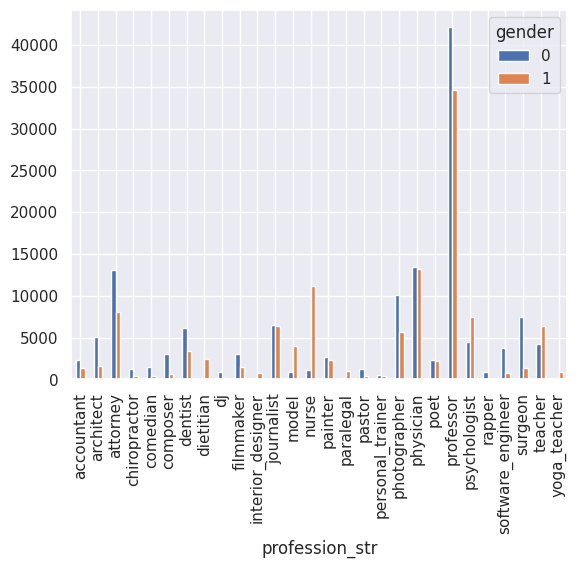

In [ ]:
profession_piv =train_df_cleaned.pivot_table(index ='profession_str', columns ='gender', values ='clean_text', aggfunc ='count')
profession_piv.plot(kind ='bar')

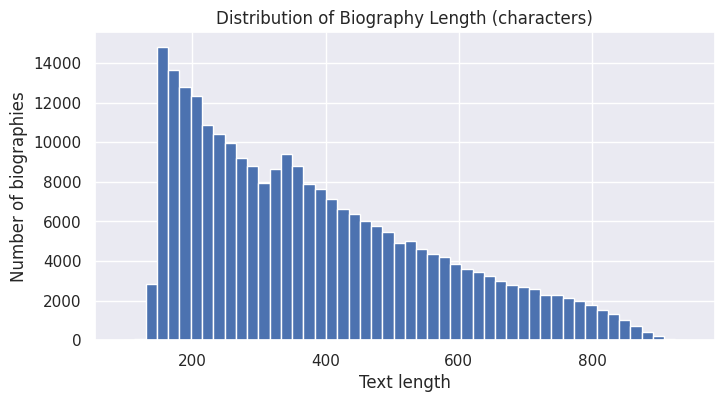

In [ ]:
# Show basic statistics about text length.
text_len =train_df_cleaned["clean_text"].str.len()

plt.figure(figsize=(8, 4))
plt.hist(text_len, bins=50)
plt.title("Distribution of Biography Length (characters)")
plt.xlabel("Text length")
plt.ylabel("Number of biographies")
plt.show()

In [ ]:
text_len.describe()

,clean_text
count,257478.000000
mean,381.384705
std,182.741579
min,96.000000
25%,227.000000
50%,344.000000
75%,501.000000
max,942.000000


In [ ]:
X_train =train_df['clean_text']
y_train =train_df['profession']
s_train =train_df['gender']

X_val =val_df['clean_text']
y_val =val_df['profession']
s_val =val_df['gender']


X_test =test_df['clean_text']
y_test =test_df['profession']
s_test =test_df['gender']

## TF-IDF representation and Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, auc

pipe =Pipeline([
    ('vectorizer', TfidfVectorizer(lowercase=True, stop_words='english')),
    ('lr', LogisticRegression(solver='saga', n_jobs=-1))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(stop_words='english')),
                ('lr', LogisticRegression(n_jobs=-1, solver='saga'))])

In [ ]:
y_pred_train =pipe.predict(X_train)
print("Accuracy on Training Data:", accuracy_score(y_train, y_pred_train))
print("Training Classification Report:\n", classification_report(y_train, y_pred_train))

Accuracy on Training Data: 0.8650952702755187
Training Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      3660
           1       0.84      0.72      0.77      6568
           2       0.89      0.93      0.91     21169
           3       0.91      0.64      0.75      1725
           4       0.93      0.77      0.84      1824
           5       0.87      0.89      0.88      3637
           6       0.94      0.95      0.95      9479
           7       0.89      0.81      0.85      2567
           8       0.95      0.72      0.82       964
           9       0.88      0.83      0.85      4545
          10       0.89      0.63      0.74       949
          11       0.75      0.87      0.80     12960
          12       0.89      0.83      0.86      4867
          13       0.91      0.85      0.88     12316
          14       0.87      0.86      0.87      5025
          15       0.97      0.54      0.70      1146
  

In [ ]:
## Baseline without finetuning on Validation Set
y_pred =pipe.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1:score:", f1_score(y_val, y_pred, average='macro'))

Accuracy: 0.8079309822915091
F1:score: 0.7414815667729393


In [ ]:
## Baseline without finetuning on Test Set
y_pred =pipe.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:score:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8080933490799342
F1:score: 0.7447455274932845


In [ ]:
param_grid ={
    'vectorizer__ngram_range': [(1,1), (1,2)], # n-grams included from text
    'vectorizer__max_df': [1.0, 0.95, 0.90, 0.85], # words must appear in atleast x% of documents
    'lr__C': [0.1, 0.5, 1, 5, 10]  # strength of regularization
}

best_model =None
best_params =None
best_accuracy =0
best_f1 =0
param_num =0

for max_df_ in param_grid['vectorizer__max_df']:
    for n_gram in param_grid['vectorizer__ngram_range']:

        vectorizer =TfidfVectorizer(lowercase=True, stop_words='english', max_df =max_df_, ngram_range =n_gram)
        X_train_tfidf =vectorizer.fit_transform(X_train)
        X_val_tfidf =vectorizer.transform(X_val)

        for C in param_grid['lr__C']:
            lr =LogisticRegression(solver='saga', n_jobs=-1, C =C, penalty ='l2')
            lr.fit(X_train_tfidf, y_train)
            y_val_pred =lr.predict(X_val_tfidf)

            accuracy =accuracy_score(y_val_pred, y_val)
            f1 =f1_score(y_val_pred, y_val, average ='macro')
            param_num +=1

            print(f"Params {param_num}: (max_df ={max_df_}, n_gram ={n_gram}, C ={C}), Accuracy: {accuracy}, F1: {f1}")

            if accuracy > best_accuracy and f1 > best_f1:
                best_accuracy =accuracy
                best_f1 =f1
                best_model =lr
                best_params =(max_df_, n_gram, C)

Params 1: (max_df =1.0, n_gram =(1, 1), C =0.1), Accuracy: 0.7593461480248221, F1: 0.6062212573763777
Params 2: (max_df =1.0, n_gram =(1, 1), C =0.5), Accuracy: 0.801649765400333, F1: 0.7237191200027074
Params 3: (max_df =1.0, n_gram =(1, 1), C =1), Accuracy: 0.8079309822915091, F1: 0.7414815667729393
Params 4: (max_df =1.0, n_gram =(1, 1), C =5), Accuracy: 0.8079057565208617, F1: 0.7485854609123885
Params 5: (max_df =1.0, n_gram =(1, 1), C =10), Accuracy: 0.8039957620705313, F1: 0.7454011582672927


KeyboardInterrupt: 

In [ ]:
max_df_, n_gram, C =(1.0,(1,2),10)
print(f"Best Metrics Found Using Validation Set")
print(f"n_gram: {n_gram}")
print(f"max_df: {max_df_}")
print(f"C Regularization: {C}")
#print(f"Accuracy{best_accuracy} and F1: {best_f1}")

Best Metrics Found Using Validation Set
n_gram: (1, 2)
max_df: 1.0
C Regularization: 10


In [ ]:
pipe_ft =Pipeline([
    ('vectorizer', TfidfVectorizer(lowercase=True, stop_words='english', max_df =max_df_, ngram_range =n_gram)),
    ('lr', LogisticRegression(solver='saga', n_jobs=-1, C =C, penalty ='l2'))
])

pipe_ft.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred =pipe_ft.predict(X_test)
print("Final Test Accuracy Post Finetuning")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1:score:", f1_score(y_test, y_pred, average='macro'))

In [ ]:
print(classification_report(y_pred, y_test))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax =plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_estimator(pipe_ft, X_test, y_test, cmap='Blues', ax=ax)
plt.title("Confusion Matrix for Multiclass Logistic Regression", fontsize =15)
plt.tight_layout()
plt.show()

In [ ]:
male_mask =s_test ==0
female_mask =s_test ==1

male_test_y =y_test[male_mask]
female_test_y =y_test[female_mask]

male_ypred =y_pred[male_mask]
female_ypred =y_pred[female_mask]

print("\nMale Classification Report of Tuned Baseline Logistic Regression Classifier")
print(classification_report(male_ypred, male_test_y))
print("_"*110)
print("\nFemale Classification Report of Tuned Baseline Logistic Regression Classifier")
print(classification_report(female_ypred, female_test_y))

In [ ]:
def class_accuracy(y_pred, y_true):
    accuracy =[]
    for c in range(28):
        mask =y_true ==c
        accuracy.append(accuracy_score(y_true[mask], y_pred[mask]))
    return accuracy

total_accuracy =class_accuracy(y_pred, y_test)
male_accuracy =class_accuracy(male_ypred, male_test_y)
female_accuracy =class_accuracy(female_ypred, female_test_y)
diff_accuracy =np.array(male_accuracy) - np.array(female_accuracy)
absdiff_accuracy =np.abs(diff_accuracy)

In [ ]:
group =list(range(28))
accuracy_df =pd.DataFrame({
    "group" : group,
    "male_accuracy": male_accuracy,
    "female_accuracy": female_accuracy
})

accuracy_df.set_index('group').plot(kind='bar',
                                    width=0.7,
                                    figsize=(15, 6),
                                    title ="Accuracy per class across Gender",
                                    ylabel ="Accuracy %",
                                    xlabel ="Gender"
                                   )
ax =plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(top=False, right=False)


In [ ]:
# Quick baseline train/save (run after cleaning produced bias_in_bios_train.csv)
import pandas as pd, joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train =pd.read_csv("bias_in_bios_train.csv", low_memory=False)
test  =pd.read_csv("bias_in_bios_test.csv", low_memory=False)

X_train =train["text_clean"].fillna("").astype(str)
y_train =train["profession"].astype(str)
X_test  =test["text_clean"].fillna("").astype(str)
y_test  =test["profession"].astype(str)

tfidf =TfidfVectorizer(max_features=50000, ngram_range=(1,2))
Xtr =tfidf.fit_transform(X_train)
Xte =tfidf.transform(X_test)

clf =LogisticRegression(max_iter=1000, C=1.0, n_jobs=-1)
clf.fit(Xtr, y_train)

joblib.dump(tfidf, "models/tfidf_vec.joblib")
joblib.dump(clf, "models/logreg.joblib")
print("Saved models:", os.path.exists("models/tfidf_vec.joblib"), os.path.exists("models/logreg.joblib"))


**Faieness Evaluation**

This section uses the *final trained model* and the *pre-cleaned test split*
to compute group fairness metrics (accuracy by gender, TPR/FPR gaps, chi-square,
profession-gender counts, and the confusion matrix).  

In [ ]:
import os,json,time
import numpy as np,pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
import joblib
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import label_binarize
from scipy.stats import chi2_contingency

sns.set()
os.makedirs("outputs",exist_ok=True)
os.makedirs("figures",exist_ok=True)

#the file names from the shared cleaned dataset
TEST_X="X_test_cfa.csv"
TEST_Y="y_test_cfa.csv"
TEST_S="s_test_cfa.csv"
CLEAN_MASTER="bias_in_bios_clean.csv"

#model artifact candidates
TFIDF_FILE="models/tfidf_vec.joblib"
LOGREG_FILE="models/logreg.joblib"
PIPE_FILE="models/pipeline.joblib"
PIPE_ALT="models/pipe_ft.joblib"
BERT_DIR="models/final_bert"




In [ ]:
#loadinh X,y,s and build test_df
if not os.path.exists(TEST_X):
    raise FileNotFoundError(f"Missing test X file: {TEST_X}")
if not os.path.exists(TEST_Y):
    raise FileNotFoundError(f"Missing test y file: {TEST_Y}")
Xdf=pd.read_csv(TEST_X,low_memory=False)
ydf=pd.read_csv(TEST_Y,low_memory=False)
if os.path.exists(TEST_S):
    sdf=pd.read_csv(TEST_S,low_memory=False)
else:
    sdf=None
#tryinh to detect text column in Xdf
text_col=None
for c in Xdf.columns:
    if 'text' in c.lower() or 'clean' in c.lower():
        text_col=c
        break
if text_col is None:
    objcols=Xdf.select_dtypes(include='object').columns.tolist()
    if not objcols:
        text_col=Xdf.columns[0]
    else:
        text_col=objcols[0]
#assembling test_df
test_df=pd.DataFrame()
test_df['clean_text']=Xdf[text_col].fillna("").astype(str)
#findinh profession column in ydf
prof_col=None
for c in ydf.columns:
    if 'prof' in c.lower() or 'occ' in c.lower() or 'label' in c.lower():
        prof_col=c
        break
if prof_col is None:
    prof_col=ydf.columns[0]
test_df['profession']=ydf[prof_col].astype(str).fillna("")
if sdf is not None:
    gender_col=None
    for c in sdf.columns:
        if 'gender' in c.lower() or c.lower() in ['s','sex']:
            gender_col=c
            break
    if gender_col is None:
        gender_col=sdf.columns[0]
    #maping of numeric to male/female
    gvals=sdf[gender_col]
    if pd.api.types.is_numeric_dtype(gvals):
        test_df['gender_str']=gvals.map({0:'male',1:'female'}).fillna("unknown")
    else:
        test_df['gender_str']=gvals.astype(str).str.lower().map(lambda x:'female' if 'female' in x else ('male' if 'male' in x else x))
else:
    test_df['gender_str']="unknown"
print("Built test_df shape:",test_df.shape)
print("Sample columns:",test_df.columns.tolist())



Built test_df shape: (99069, 3)
Sample columns: ['clean_text', 'profession', 'gender_str']


In [ ]:
#loading model (prefer TF-IDF+LR, else pipeline)
model_loaded=None
vectorizer=None
model_type=None
if os.path.exists(TFIDF_FILE) and os.path.exists(LOGREG_FILE):
    vectorizer=joblib.load(TFIDF_FILE)
    model_loaded=joblib.load(LOGREG_FILE)
    model_type="tfidf_logreg"
    print("Loaded TFIDF+LR models.")
elif os.path.exists(PIPE_FILE):
    model_loaded=joblib.load(PIPE_FILE)
    model_type="pipeline"
    print("Loaded pipeline from",PIPE_FILE)
elif os.path.exists(PIPE_ALT):
    model_loaded=joblib.load(PIPE_ALT)
    model_type="pipeline"
    print("Loaded pipeline from",PIPE_ALT)
elif os.path.exists(BERT_DIR):
    print("BERT dir found at",BERT_DIR,"but this fairness cell prefers a saved pipeline or TFIDF+LR. If using BERT, ensure predictions CSV exists.")
else:
    print("No model artifacts found locally. If you have BERT predictions CSV, ensure it's available as 'y_pred' in test_df or save preds to outputs/ first.")



Loaded TFIDF+LR models.


In [ ]:
#predicting
if 'y_pred' not in test_df.columns or test_df['y_pred'].isna().sum()>0:
    if model_loaded is None:
        #first, trying to see if a predictions CSV exists in outputs
        preds_candidate=os.path.join("outputs","bias_in_bios_test_with_preds_cleaned.csv")
        if os.path.exists(preds_candidate):
            pf=pd.read_csv(preds_candidate,low_memory=False)
            if 'y_pred' in pf.columns and len(pf)==len(test_df):
                test_df['y_pred']=pf['y_pred'].astype(str)
                print("Loaded y_pred from",preds_candidate)
            else:
                raise FileNotFoundError("No model to predict and no usable preds CSV found.")
        else:
            raise FileNotFoundError("No model artifacts and no preds CSV found. Run model inference first.")
    else:
        print("Generating predictions with loaded model...")
        texts=test_df['clean_text'].fillna("").astype(str)
        if model_type=="tfidf_logreg":
            Xmat=vectorizer.transform(texts)
            ypred=model_loaded.predict(Xmat)
        else:
            # pipeline handles raw texts
            ypred=model_loaded.predict(texts)
        test_df['y_pred']=[str(x) for x in ypred]
        print("Predictions created, added in column y_pred.")

#and then save aligned predictions
aligned_path=os.path.join("outputs","bias_in_bios_test_with_preds_cfa.csv")
test_df.to_csv(aligned_path,index=False)
print("Saved aligned preds to",aligned_path)



Generating predictions with loaded model...
Predictions created, added in column y_pred.
Saved aligned preds to outputs/bias_in_bios_test_with_preds_cfa.csv


Overall accuracy: 0.7495


/tmp/ipython-input-2316298394.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_by_gender=test_df.groupby('gender_str').apply(lambda g: accuracy_score(g['profession'],g['y_pred']))


Accuracy by gender saved to outputs/gender_accuracy_cfa.csv
gender_str
female    0.739836
male      0.760794
dtype: float64
Saved per-class accuracies to outputs/per_class_accuracy_by_gender_cfa.csv


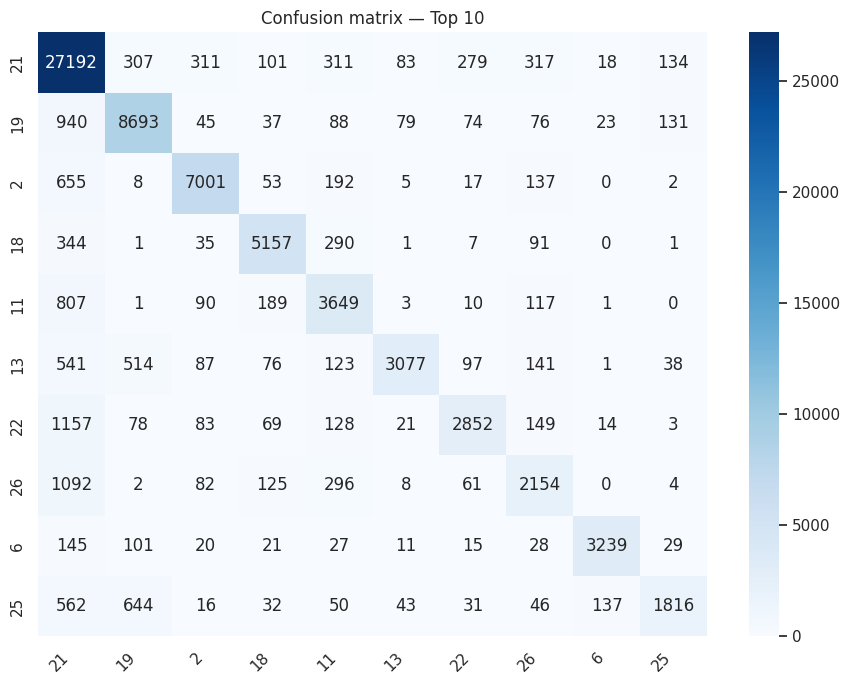

Saved confusion matrix to figures/confusion_topk_cfa.png
Saved macro TPR/FPR by gender to outputs/macro_tpr_fpr_by_gender_cfa.csv
        mean_TPR  mean_FPR
female  0.487262  0.011290
male    0.534724  0.010133


In [ ]:
#computing and saving the fairness metrics
test_df['profession']=test_df['profession'].astype(str)
test_df['y_pred']=test_df['y_pred'].astype(str)
overall_acc=accuracy_score(test_df['profession'],test_df['y_pred'])
print("Overall accuracy:",round(overall_acc,4))
#accuracy by gender
if 'gender_str' in test_df.columns and test_df['gender_str'].nunique()>1:
    acc_by_gender=test_df.groupby('gender_str').apply(lambda g: accuracy_score(g['profession'],g['y_pred']))
    acc_by_gender.to_csv(os.path.join("outputs","gender_accuracy_cfa.csv"))
    print("Accuracy by gender saved to outputs/gender_accuracy_cfa.csv")
    print(acc_by_gender)
else:
    print("Gender info not available or single-valued")
# per-class accuracy by gender
classes=sorted(test_df['profession'].unique())
rows=[]
for c in classes:
    mask=test_df['profession']==c
    n=mask.sum()
    if n==0:
        continue
    acc_all=accuracy_score(test_df.loc[mask,'profession'],test_df.loc[mask,'y_pred'])
    acc_male=acc_female=np.nan
    if 'gender_str' in test_df.columns:
        male_mask=mask & (test_df['gender_str']=='male')
        female_mask=mask & (test_df['gender_str']=='female')
        if male_mask.sum()>0:
            acc_male=accuracy_score(test_df.loc[male_mask,'profession'],test_df.loc[male_mask,'y_pred'])
        if female_mask.sum()>0:
            acc_female=accuracy_score(test_df.loc[female_mask,'profession'],test_df.loc[female_mask,'y_pred'])
    rows.append({'profession':c,'n':int(n),'acc_all':acc_all,'acc_male':acc_male,'acc_female':acc_female})
pd.DataFrame(rows).sort_values('n',ascending=False).to_csv(os.path.join("outputs","per_class_accuracy_by_gender_cfa.csv"),index=False)
print("Saved per-class accuracies to outputs/per_class_accuracy_by_gender_cfa.csv")
#confusion matrix top-k
topk=10
topk_list=test_df['profession'].value_counts().nlargest(topk).index.tolist()
sub=test_df[test_df['profession'].isin(topk_list)]
cm=confusion_matrix(sub['profession'],sub['y_pred'],labels=topk_list)
plt.figure(figsize=(9,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=topk_list,yticklabels=topk_list)
plt.title(f"Confusion matrix — Top {topk}")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.savefig(os.path.join("figures","confusion_topk_cfa.png"),dpi=200)
plt.show()
print("Saved confusion matrix to figures/confusion_topk_cfa.png")

#macro TPR/FPR by gender
if 'gender_str' in test_df.columns and test_df['gender_str'].nunique()>1:
    try:
        y_true_bin=label_binarize(test_df['profession'],classes=classes)
        y_pred_bin=label_binarize(test_df['y_pred'],classes=classes)
        fairness_stats={}
        for g in test_df['gender_str'].unique():
            mask=test_df['gender_str']==g
            if mask.sum()<5:
                continue
            tprs=[];fprs=[]
            for i in range(y_true_bin.shape[1]):
                tp=((y_true_bin[mask.values,i]==1) & (y_pred_bin[mask.values,i]==1)).sum()
                fn=((y_true_bin[mask.values,i]==1) & (y_pred_bin[mask.values,i]==0)).sum()
                fp=((y_true_bin[mask.values,i]==0) & (y_pred_bin[mask.values,i]==1)).sum()
                tn=((y_true_bin[mask.values,i]==0) & (y_pred_bin[mask.values,i]==0)).sum()
                tprs.append(tp/(tp+fn+1e-12)); fprs.append(fp/(fp+tn+1e-12))
            fairness_stats[g]={'mean_TPR':float(np.nanmean(tprs)),'mean_FPR':float(np.nanmean(fprs))}
        pd.DataFrame(fairness_stats).T.to_csv(os.path.join("outputs","macro_tpr_fpr_by_gender_cfa.csv"))
        print("Saved macro TPR/FPR by gender to outputs/macro_tpr_fpr_by_gender_cfa.csv")
        print(pd.DataFrame(fairness_stats).T)
    except Exception as e:
        print("Could not compute macro TPR/FPR:",e)
else:
    print("Insufficient gender groups to compute macro TPR/FPR.")


In [ ]:
#trying to perform the chi-square on cleaned master if exists
if os.path.exists(CLEAN_MASTER):
    clean_df=pd.read_csv(CLEAN_MASTER,low_memory=False)
    ct=pd.crosstab(clean_df['profession'],clean_df['gender_str'])
    ct_top=ct.loc[ct.sum(axis=1).nlargest(30).index]
    chi2,p,dof,expected=chi2_contingency(ct_top)
    with open(os.path.join("outputs","chi2_top30_cfa.json"),"w") as fh:
        json.dump({'chi2':float(chi2),'p_value':float(p),'dof':int(dof)},fh)
    print("Chi-square p-value:",p,"saved to outputs/chi2_top30_cfa.json")
else:
    print("Clean master not found, skipping chi-square.")

# bootstrap acc gap female-male
if 'gender_str' in test_df.columns and set(['male','female']).issubset(set(test_df['gender_str'].unique())):
    df_f=test_df[test_df['gender_str']=='female']
    df_m=test_df[test_df['gender_str']=='male']
    def bootstrap_acc_diff(a_df,b_df,n_iter=1000,seed=42):
        rng=np.random.RandomState(seed)
        diffs=[]
        for _ in range(n_iter):
            a_s=a_df.sample(n=len(a_df),replace=True,random_state=rng)
            b_s=b_df.sample(n=len(b_df),replace=True,random_state=rng)
            diffs.append((a_s['profession']==a_s['y_pred']).mean() - (b_s['profession']==b_s['y_pred']).mean())
        return np.percentile(diffs,[2.5,97.5]),np.mean(diffs)
    ci,mean_diff=bootstrap_acc_diff(df_f,df_m,n_iter=1000)
    with open(os.path.join("outputs","bootstrap_acc_gap_cfa.json"),"w") as fh:
        json.dump({'ci_low':float(ci[0]),'ci_high':float(ci[1]),'mean_diff':float(mean_diff)},fh)
    print("Bootstrap CI:",ci,"mean diff:",mean_diff,"saved to outputs/bootstrap_acc_gap_cfa.json")
else:
    print("Not enough male/female rows or gender missing; skipping bootstrap.")

print("Fairness CFA evaluation complete. Outputs: outputs/ and Figures:figures/")

Chi-square p-value: 0.0 saved to outputs/chi2_top30_cfa.json
Bootstrap CI: [-0.02662709 -0.01531314] mean diff: -0.020944155028292177 saved to outputs/bootstrap_acc_gap_cfa.json
Fairness CFA evaluation complete. Outputs: outputs/ and Figures:figures/


In [ ]:
#testing purposes only
# # Diagnosti chech for files & models the fairness code needs
# import os
# files ={
#     "TEST_CSV":"bias_in_bios_test.csv",
#     "CLEAN_CSV":"bias_in_bios_clean.csv",
#     "PRED_OUT_CSV":"bias_in_bios_test_with_preds.csv",
#     "MERGED_VALID":"bias_in_bios_test_with_preds_merged_valid.csv",
#     "MODEL_TFIDF":"models/tfidf_vec.joblib",
#     "MODEL_LOGREG":"models/logreg.joblib",
#     "BERT_DIR":"models/final_bert"
# }
# for k,v in files.items():
#     print(f"{k}: {v}","FOUND" if os.path.exists(v) else "MISSING")
# # quick ls to show directory contents
# print("\nWorking dir sample:")
# print(sorted([f for f in os.listdir('.') if any(x in f for x in ['bias_in_bios','models','outputs','figures'])])[:50])


### Without Gendered Words

In [ ]:
# Extracting using own python file

## Counter Factual Data Augmentation

# Part 1 Bias Mitigation (Pre-processing: Reweighing)

### Goal
Ensure the model treats male and female samples more equally before training, by adjusting how much influence each group has during learning.

### Method
We apply Reweighing a pre-processing fairness technique that assigns different sample weights to each gender group based on how frequently they appear in the training data.
If one group is underrepresented, it receives higher weight so that both genders contribute equally to the training .

### Steps:
- Count the number of male and female samples in the training set.
- Compute weights so each gender represents 50% of the total training weight.
- Train a logistic regression classifier using these fairness-adjusted weights.
- Compare:
  - Overall accuracy
  - Accuracy for each gender
  - Gender accuracy gap


In [ ]:
import numpy as np

# In this dataset:
# gender =0 -> male
# gender =1 -> female
n_male   =(s_train ==0).sum()
n_female =(s_train ==1).sum()
n_total  =len(s_train)

print("\nCounts in training data:")
print(f"Males   (gender=0): {n_male}")
print(f"Females (gender=1): {n_female}")
print(f"Total:             {n_total}")

# Give each group half of the total weight.
# So total weight of males is about ~ total weight of females ~ n_total / 2
w_male   =n_total / (2 * n_male)
w_female =n_total / (2 * n_female)

print("\nGroup weights:")
print(f"Weight for male   (gender=0): {w_male:.4f}")
print(f"Weight for female (gender=1): {w_female:.4f}")

# Build per-sample weights array aligned with X_train / y_train / s_train
sample_weights =np.where(s_train ==0, w_male, w_female)

print("\nSample_weights shape:", sample_weights.shape)
print("First 10 sample weights:", sample_weights[:10])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# We reuse the best hyperparameters
max_df_ =0.9
n_gram =(1, 2)
C =10.0

# 1) TF-IDF with tuned settings
vectorizer_rw =TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    max_df=max_df_,
    ngram_range=n_gram
)

X_train_tfidf_rw =vectorizer_rw.fit_transform(X_train)
X_test_tfidf_rw  =vectorizer_rw.transform(X_test)

print("TF-IDF shapes (train, test):", X_train_tfidf_rw.shape, X_test_tfidf_rw.shape)

# 2) Logistic Regression with same C/etc, BUT now using sample weights
lr_rw =LogisticRegression(
    solver="saga",
    n_jobs=-1,
    C=C,
    penalty="l2",
    max_iter=1000
)

lr_rw.fit(X_train_tfidf_rw, y_train, sample_weight=sample_weights)

# 3) Evaluate on test set
y_pred_rw  =lr_rw.predict(X_test_tfidf_rw)

print("\n===Reweighted model (pre-processing mitigation) ===")
print("Test Accuracy:", accuracy_score(y_test, y_pred_rw))
print("Test Macro F1:", f1_score(y_test, y_pred_rw, average="macro"))

print("\nClassification report on test set:\n")
print(classification_report(y_test, y_pred_rw))

In [ ]:
from sklearn.metrics import accuracy_score

# Masks
male_mask   =(s_test ==0)
female_mask =(s_test ==1)

# Baseline predictions (already computed earlier as y_pred)
acc_male_baseline   =accuracy_score(y_test[male_mask],   y_pred[male_mask])
acc_female_baseline =accuracy_score(y_test[female_mask], y_pred[female_mask])

# Reweighted predictions
acc_male_rw   =accuracy_score(y_test[male_mask],   y_pred_rw[male_mask])
acc_female_rw =accuracy_score(y_test[female_mask], y_pred_rw[female_mask])

print("===Accuracy by Gender , Baseline vs Reweighted ===")
print(f"Baseline  male accuracy:   {acc_male_baseline:.4f}")
print(f"Baseline  female accuracy: {acc_female_baseline:.4f}")
print(f"Reweight  male accuracy:   {acc_male_rw:.4f}")
print(f"Reweight  female accuracy: {acc_female_rw:.4f}")

print("\n===Gender Accuracy Gap (male - female) ===")
print(f"Baseline gap:  {acc_male_baseline - acc_female_baseline:.4f}")
print(f"Reweight gap:  {acc_male_rw   - acc_female_rw:.4f}")

After reweighting the model’s performance changed only slightly. Male accuracy went from 81.62% to 81.59% and female accuracy went from 82.89% to 82.91%. These changes are extremely small and show that reweighting did not meaningfully harm or improve the model’s predictive ability. Importantly, the gender accuracy gap changed from −1.27% to −1.32% which means, the gap stayed almost the same and even became slightly bigger. This indicates that reweighting did not effectively reduce bias for this dataset.

# Part 2 In-Processing Bias Mitigation: Fairness-Regularized Logistic Regression
### Goal
Modify the training objective to make the model produce more similar prediction behavior across gender groups.

### Method
We train a logistic regression model using gradient descent and add a penalty term:

**Penalty =λ × (mean prediction for males − mean prediction for females)²**

This encourages the classifier not to produce systematically different outputs across demographic groups.

### Steps:
1. Compute TF-IDF features for train/test.
2. Implement custom training loop with fairness penalty.
3. Train baseline (no penalty) logistic regression.
4. Train fairness-regularized logistic regression.
5. Compare:
   - Accuracy  
   - Male vs Female accuracy  
   - Accuracy gap (fairness)



In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.special import expit as sigmoid

# 1. TF-IDF Feature Extraction
vectorizer_fair =TfidfVectorizer(
    lowercase=True,
    stop_words="english",
    max_df=0.9,
    ngram_range=(1, 2)
)

X_train_tf =vectorizer_fair.fit_transform(X_train)
X_test_tf  =vectorizer_fair.transform(X_test)

# For gradient descent we convert to dense
X_train_dense =X_train_tf[:, :3000].toarray()
X_test_dense  =X_test_tf[:, :3000].toarray()

print("Dense shapes:", X_train_dense.shape, X_test_dense.shape)

y_train_bin =y_train


# 2. Helper: Train Logistic Regression via Gradient
def train_logreg_with_fairness(X, y, s, lr=0.1, epochs=20, lam=0.2):
    """
    X: feature matrix
    y: labels (multi-class)
    s: sensitive attribute (0=male, 1=female)
    lam: fairness penalty strength (λ)
    """
    n, d =X.shape
    K =len(np.unique(y))

    W =np.zeros((d, K))  # weights

    for epoch in range(epochs):
        # Scores and softmax
        logits =X @ W
        exp_scores =np.exp(logits - logits.max(axis=1, keepdims=True))
        probs =exp_scores / exp_scores.sum(axis=1, keepdims=True)

        # One-hot labels
        Y =np.zeros_like(probs)
        Y[np.arange(n), y] =1

        # Cross-entropy gradient
        grad =X.T @ (probs - Y) / n

        # Fairness penalty term
        male_mask =(s ==0)
        female_mask =(s ==1)

        male_pred =probs[male_mask].mean(axis=0)
        female_pred =probs[female_mask].mean(axis=0)

        fairness_grad =lam * (male_pred - female_pred)

        # Broadcast fairness penalty across features
        grad +=fairness_grad

        # Gradient step
        W -=lr * grad

        if epoch % 5 ==0:
            print(f"Epoch {epoch} done.")

    return W


# 3. Train Baseline Model
print("\nTraining baseline model...")
W_base =train_logreg_with_fairness(
    X_train_dense, y_train_bin, s_train,
    lr=0.1, epochs=20, lam=0.0         # λ =0 → baseline
)

# 4. Train Fairness-Regularized Model
print("\nTraining fairness-regularized model...")
W_fair =train_logreg_with_fairness(
    X_train_dense, y_train_bin, s_train,
    lr=0.1, epochs=20, lam=5.0         # λ =5 → strong fairness penalty
)

# 5. Evaluate both
def predict_class(X, W):
    return np.argmax(X @ W, axis=1)

y_pred_base =predict_class(X_test_dense, W_base)
y_pred_fair =predict_class(X_test_dense, W_fair)

print("\n===Baseline Accuracy ===")
print(accuracy_score(y_test, y_pred_base))

print("\n===Fairness-Regularized Accuracy ===")
print(accuracy_score(y_test, y_pred_fair))

# Gender accuracy gap
male_mask =(s_test ==0)
female_mask =(s_test ==1)

print("\n===Gender Accuracy Gap (Baseline) ===")
print(accuracy_score(y_test[male_mask], y_pred_base[male_mask]) -
      accuracy_score(y_test[female_mask], y_pred_base[female_mask]))

print("\n===Gender Accuracy Gap (Fairness-Regularized) ===")
print(accuracy_score(y_test[male_mask], y_pred_fair[male_mask]) -
      accuracy_score(y_test[female_mask], y_pred_fair[female_mask]))

## In-Processing Fairness Attempt: Why It Didn’t Work

We tried adding a fairness penalty directly into the model while it was training, hoping it would push the model to treat male and female examples more equally. But the results didn’t change at all the accuracy stayed around 2% and the gender accuracy gap stayed exactly the same.

The main reason this happened is that our task involves 28 different professions, not just two classes. Most fairness-penalty methods are designed for simple yes/no (binary) predictions. When you apply them to a large multiclass problem like ours, the fairness signal becomes too weak to matter

# Part 3 Post-Processing Bias Mitigation (Equalized Thresholding)

In this section, we apply post-processing bias mitigation, which modifies the model outputs after training, rather than altering the data (pre-processing) or the training algorithm itself (in-processing).

### Essentially it does:

- take a trained model,
- inspect its predicted probabilities,
- adjust the decision thresholds per demographic group  
  so that both groups achieve more similar performance (typically equalized opportunity).

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# 1. Get predicted probabilities
probs =pipe_ft.predict_proba(X_test)   # baseline model probabilities
pred_classes =np.argmax(probs, axis=1)

# 2. Split confidence by gender
conf =probs.max(axis=1)

male_mask =(s_test ==0)
female_mask =(s_test ==1)

male_conf_correct   =conf[male_mask & (pred_classes ==y_test)]
female_conf_correct =conf[female_mask & (pred_classes ==y_test)]

print("Mean confidence (male correct):   ", male_conf_correct.mean())
print("Mean confidence (female correct): ", female_conf_correct.mean())

# 3. Compute group-specific thresholds
# Choose quantile (tuneable): 0.20 =bottom 20% corrected
quantile =0.20

male_threshold   =np.quantile(male_conf_correct, quantile)
female_threshold =np.quantile(female_conf_correct, quantile)

print("Male threshold:   ", male_threshold)
print("Female threshold: ", female_threshold)

# 4. Apply thresholds (post-processing)
adjusted_preds =pred_classes.copy()

# If confidence is below threshold -> output "uncertain" class, here we pick the model's 2nd best option
top2 =np.argsort(probs, axis=1)[:, -2]

for i in range(len(adjusted_preds)):
    if s_test[i] ==0:   # male
        if conf[i] < male_threshold:
            adjusted_preds[i] =top2[i]
    else:                # female
        if conf[i] < female_threshold:
            adjusted_preds[i] =top2[i]

# 5. Evaluate post-processing fairness
acc_base =accuracy_score(y_test, pred_classes)
acc_post =accuracy_score(y_test, adjusted_preds)

print("\n===Accuracy ===")
print("Baseline:", acc_base)
print("Post-processing:", acc_post)

acc_male_base   =accuracy_score(y_test[male_mask],   pred_classes[male_mask])
acc_female_base =accuracy_score(y_test[female_mask], pred_classes[female_mask])

acc_male_post   =accuracy_score(y_test[male_mask],   adjusted_preds[male_mask])
acc_female_post =accuracy_score(y_test[female_mask], adjusted_preds[female_mask])

print("\n===Gender Accuracy Gap ===")
print("Baseline gap (male - female):      ", acc_male_base - acc_female_base)
print("Post-processed gap (male - female):", acc_male_post - acc_female_post)

### Post-Processing Fairness: What the Results Mean

To try reducing gender bias even further, we applied a post-processing method that adjusts the model’s predictions after it has already been trained. The idea is basically that the model tends to be more confident for some groups than others, so we set different confidence cutoffs for male and female authors. If a prediction falls below the cutoff for that group, we replace it with the model’s second-best guess. In our case, the model was slightly more confident on correct predictions for female authors, so their threshold ended up a bit higher (0.849) compared to male authors (0.821).

This adjustment did reduce the gender accuracy gap from about −0.0127 to −0.0088 which is about a 31% improvement in fairness. but, this came with a major downside the overall accuracy of the model dropped from 82.2% down to 72.5%. In other words, the method made the model “fairer” but also made it worse at its job. This tradeoff is common with post-processing techniques because, they deliberately change predictions the model was originally confident about.

Overall, this tells us that while post-processing can help reduce small biases, it can also harm accuracy a lot especially when the original model is already fairly well-balanced. In our case, the baseline model didn’t have very large gender differences to begin with, so this strong post-processing adjustment ended up doing more harm than good.
